##### Dataset

In [2]:
# Petrol_Consumption.csv
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Read the data

In [6]:
df = pd.read_csv('petrol_consumption.csv')

In [7]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [8]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

##### Separate the input and output variables

In [11]:
x = df.drop('Petrol_Consumption', axis = 1)
y = df['Petrol_Consumption']

In [12]:
y

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

In [13]:
x.corrwith(y)

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
dtype: float64

##### Cross Validation

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [17]:
x_train.shape

(36, 4)

In [18]:
x_test.shape

(12, 4)

##### Build the model

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
tree = DecisionTreeRegressor(random_state=0)

In [22]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [23]:
# Mean Absolute Error?
# Mean Absolute Percentage Error?

##### Performance Evaluation

In [25]:
y_pred = tree.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [28]:
mean_absolute_error(y_test, y_pred)

68.08333333333333

In [30]:
mean_absolute_percentage_error(y_test, y_pred)

0.1294003614849453

In [31]:
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [32]:
result

,Actual,Predicted
29,534,541.0
4,410,498.0
26,577,628.0
30,571,628.0
32,577,628.0
37,704,644.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,464.0


##### Feature Inportance

<BarContainer object of 4 artists>

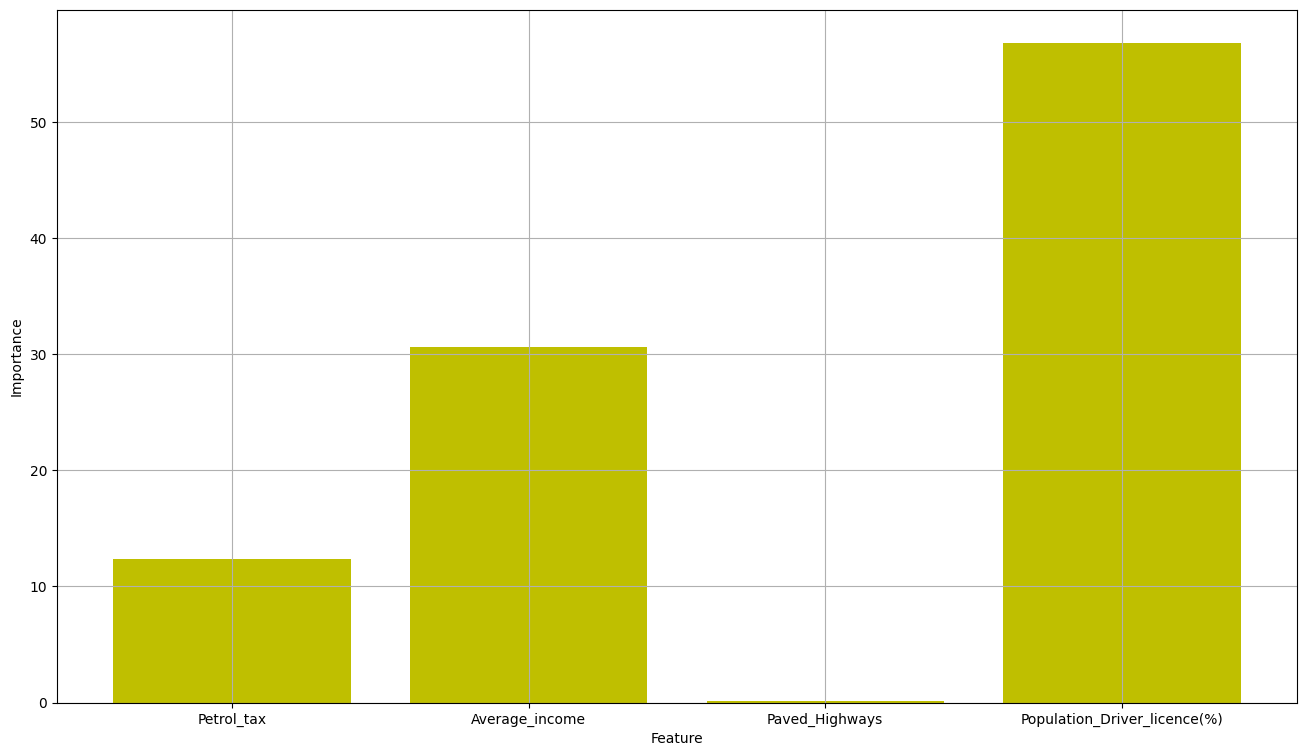

In [35]:
plt.figure(figsize=(16,9))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid()
plt.bar(x.columns, tree.feature_importances_ * 100, color='y')

##### Plot the tree

In [37]:
from sklearn.tree import plot_tree

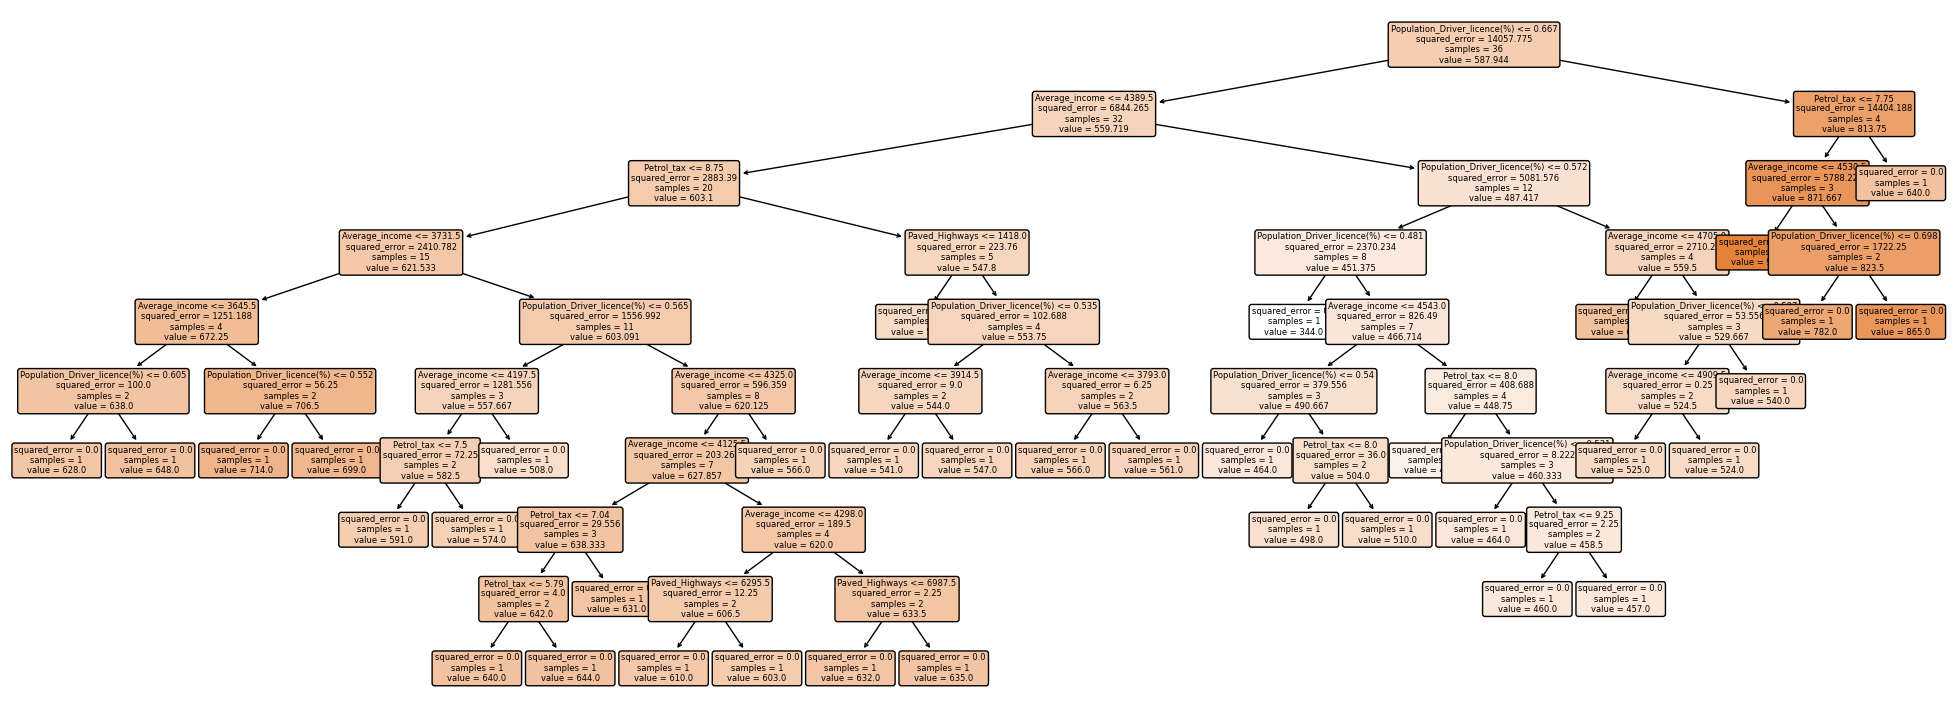

In [45]:
plt.figure(figsize=(25,9))
plot_tree(tree, fontsize=6, feature_names=x.columns, filled=True,
         rounded=True);
plt.savefig('tree.png')

In [49]:
new = pd.DataFrame(data=[[7.00,	4207, 6580, 0.545],
                        [6.04, 5015, 2306, 0.772]], columns=x.columns)

In [50]:
new

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,7.00,4207,6580,0.545
1,6.04,5015,2306,0.772


In [51]:
tree.predict(new)

array([508., 865.])